In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def H_z(z,eps):
    """
    Heaviside step function- keep the que as positive
    """
    return 1.0+np.tanh(z/eps)

def f_congest(x,y,C):
    """
    function for the congest process
    Input: x: poeple actually leave - arrive wanting to leave
           y: poeple actually enter - expected who can enter
           C: capacity of the door
    Output: exp(-(x+y)/C)
    """
    return np.exp(-(x+y)/C)

def arrival(t,p,alpha,sigma):
    """
    This is the assumed arrival function
    alpha is a vector of length n
    """
    dist = p * np.exp(-1/2*((t-alpha)/sigma)**2)
    return np.sum(dist)

def leave(t,p,lambd,sigma):
    dist = p * np.exp(-1/2*((t-lambd)/sigma)**2)
    return np.sum(dist)

def model(Z,t,parameters):
    """This is the ODE for fitting into odeint()"""

    # unwrap parameters
    B = parameters[0]
    p = parameters[1]
    C1 = parameters[2]
    C2 = parameters[3]
    C3 = parameters[4]
    C4 = parameters[5]
    sigma = parameters[6]
    eps = parameters[7]
    N = parameters[8]
    
    #######################################
    #
    # Z = [x1,x2,x3,x4,y1,y2,y3,y4]T
    #
    ########################################
    # Upwrap variables - for the draft codes
    x1 = Z[0]
    x2 = Z[1]
    x3 = Z[2]
    x4 = Z[3]
    y1 = Z[4]
    y2 = Z[5]
    y3 = Z[6]
    y4 = Z[7]
    
    X1 = x1 * f_congest(x1,y1,C1)
    X2 = x2 * f_congest(x2,y2,C2)
    X3 = x3 * f_congest(x3,y3,C3)
    X4 = x4 * f_congest(x4,y4,C4)
    
    Y1 = y1 * f_congest(x1,y1,C1)
    Y2 = y2 * f_congest(x2,y2,C2)
    Y3 = y3 * f_congest(x3,y3,C3)
    Y4 = y4 * f_congest(x4,y4,C4)
    
    alpha1 = (np.arange(N).astype(float))*B
    alpha2 = (np.arange(N).astype(float)+0.5)*B
        
    a1 = arrival(t,p,alpha1,sigma)
    a2 = arrival(t,p,alpha2,sigma)
    
    lambd1 = ((np.arange(N)+ 1/4).astype(float))*B
    lambd2 = ((np.arange(N)+ 3/4).astype(float))*B
    
    l1 = leave(t,p,lambd1,sigma)
    l2 = leave(t,p,lambd2,sigma)  
    
    # Demand functions
    I1 = Y3+l1
    O1 = X3+a1
    
    I2 = Y4+l2
    O2 = X4+a2
    I3 = Y1+x3
    I4 = Y2+x4    
    O3 = X1+y4
    O4 = X2+y3
    
    # dx/dt = g(X,O)
    # dy/dt = g(Y,I)
    # here g(X,O) = (X-O)*H(x)
    # H(z) = 1+np.tanh(z/eps)
    
    # in delta t, the number of people increasing xi: 
    # Oi: people arrive wanting to leave
    # C: capacity of the door
    # Xi: actually leave
    dx1dt = (X1-O1)/C1*H_z(x1,eps)
    dx2dt = (X2-O2)/C2*H_z(x2,eps)
    dx3dt = (X3-O3)/C3*H_z(x3,eps)
    dx4dt = (X4-O4)/C4*H_z(x4,eps)
    
    dy1dt = (Y1-O1)/C1*H_z(y1,eps)
    dy2dt = (Y2-O2)/C2*H_z(y2,eps)
    dy3dt = (Y3-O3)/C3*H_z(y3,eps)
    dy4dt = (Y4-O4)/C4*H_z(y4,eps)
    
    return [dx1dt,dx2dt,dx3dt,dx4dt,dy1dt,dy2dt,dy3dt,dy4dt]



In [22]:
# Initial conditions vector
Z0 = (0,10,0,0,0,1,0,0)

# Parameters: B, p, C1,C2,C3,C4,sigma, eps, N
parameters = (0.45,0.1,1,1,1,1,1,0.1,100)
#time
t = np.linspace(0,16)
# Integrate the model equations over the time grid, t.
Campus_flow = odeint(model, Z0, t, args=(parameters,))
x1,x2,x3,x4,y1,y2,y3,y4 = Campus_flow.T

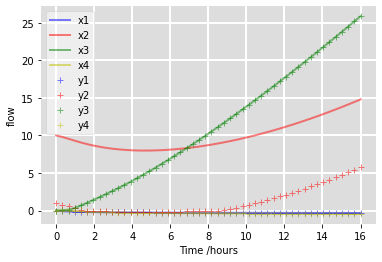

In [23]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, x1, 'b', alpha=0.5, lw=2, label='x1')
ax.plot(t, x2, 'r', alpha=0.5, lw=2, label='x2')
ax.plot(t, x3, 'g', alpha=0.5, lw=2, label='x3')
ax.plot(t, x4, 'y', alpha=0.5, lw=2, label='x4')
ax.plot(t, y1, 'b+', alpha=0.5, lw=2, label='y1')
ax.plot(t, y2, 'r+', alpha=0.5, lw=2, label='y2')
ax.plot(t, y3, 'g+', alpha=0.5, lw=2, label='y3')
ax.plot(t, y4, 'y+', alpha=0.5, lw=2, label='y4')
ax.set_xlabel('Time /hours')
ax.set_ylabel('flow')
#ax.set_ylim(0,1.2)
#ax.yaxis.set_tick_params(length=0)
#ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()